In [1]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [25]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import math

print('Libraries imported.')

Libraries imported.


In [26]:
# The code was removed by Watson Studio for sharing.

,id,distribuidor,comuna,latitud,longitud,habitantes,viviendas,vehículos,calidad
0,pe01001,Petrobras,Santiago Centro,-33.453465,-70.644193,404495,193628,59900,59.27
1,pe01002,Petrobras,Santiago Centro,-33.430747,-70.665559,404495,193628,59900,59.27
2,pe01003,Petrobras,Santiago Centro,-33.445162,-70.640700,404495,193628,59900,59.27
3,pe01004,Petrobras,Santiago Centro,-33.442951,-70.636680,404495,193628,59900,59.27
4,pe01006,Petrobras,Santiago Centro,-33.459715,-70.652395,404495,193628,59900,59.27


In [27]:
address = 'Santiago, Chile'

geolocator = Nominatim(user_agent="eds_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Santiago, Chile are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago, Chile are -33.4377968, -70.6504451.


In [28]:
# create map of Toronto using latitude and longitude values
map_chile = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, distribuidor, id_estacion in zip(df['latitud'], 
                                           df['longitud'], 
                                           df['distribuidor'], 
                                           df['id']):
    label = '{}, {}'.format(distribuidor, id_estacion)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chile)  
    
map_chile

In [29]:
CLIENT_ID = 'HHO52RQYVPEQNRYR3PVO5B1ORIEBJWE2GDPJ4JUYXTPIS1A5' # your Foursquare ID
CLIENT_SECRET = 'U4K5GA1E0Z33LW1RPQ10Y2JFDGLUMDQ0FF2TXGOIBPDH1KVP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HHO52RQYVPEQNRYR3PVO5B1ORIEBJWE2GDPJ4JUYXTPIS1A5
CLIENT_SECRET:U4K5GA1E0Z33LW1RPQ10Y2JFDGLUMDQ0FF2TXGOIBPDH1KVP


In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
RADIUS = 500 # define radius

venues_list=[]

for latitud, longitud, distribuidor, id_estacion in zip(df['latitud'], 
                                           df['longitud'], 
                                           df['distribuidor'], 
                                           df['id']):

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitud, 
        longitud, 
        RADIUS, 
        LIMIT)
    
    #print(url)
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
    venues_list.append([(
        id_estacion, 
        latitud, 
        longitud, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['ID Station', 
    'Neighborhood Latitude', 
    'Neighborhood Longitude', 
    'Venue', 
    'Venue Latitude', 
    'Venue Longitude', 
    'Venue Category']

nearby_venues.head()

,ID Station,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,pe01001,-33.453465,-70.644193,Pollos asados m&m,-33.451456,-70.642742,Fried Chicken Joint
1,pe01001,-33.453465,-70.644193,Plaza Sacramentinos,-33.451312,-70.648375,Plaza
2,pe01001,-33.453465,-70.644193,Alto Japón,-33.451181,-70.646762,Sushi Restaurant
3,pe01001,-33.453465,-70.644193,Crossfighter,-33.452239,-70.646607,Gym / Fitness Center
4,pe01001,-33.453465,-70.644193,Milano‘s Pizza,-33.450126,-70.642222,Pizza Place


In [32]:
nearby_venues.groupby('ID Station').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
ID Station,,,,,,
co1360501,5,5,5,5,5,5
pe01001,29,29,29,29,29,29
pe01002,13,13,13,13,13,13
pe01003,44,44,44,44,44,44
pe01004,81,81,81,81,81,81
pe01006,15,15,15,15,15,15
pe01008,28,28,28,28,28,28
pe1310201,5,5,5,5,5,5
pe1310401,37,37,37,37,37,37


In [33]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 216 uniques categories.


In [57]:
# one hot encoding
distribuidor_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
distribuidor_onehot['ID Station'] = nearby_venues['ID Station'] 

aux = distribuidor_onehot['ID Station']
distribuidor_onehot.drop(labels=['ID Station'], axis=1, inplace=True)
distribuidor_onehot.insert(0, 'ID Station', aux)

distribuidor_onehot.head()

,ID Station,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Internet Cafe,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,pe01001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,pe01001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,pe01001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
distribuidor_onehot.shape

(1562, 217)

In [59]:
distribuidor_grouped = distribuidor_onehot.groupby('ID Station').mean().reset_index()
distribuidor_grouped

,ID Station,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Rec Center,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Internet Cafe,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Office,Optical Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,co1360501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [60]:
distribuidor_grouped.shape

(92, 217)

In [61]:
num_top_venues = 5

for hood in distribuidor_grouped['ID Station']:
    print("----"+hood+"----")
    temp = distribuidor_grouped[distribuidor_grouped['ID Station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----co1360501----
                    venue  freq
0  Furniture / Home Store   0.2
1          Breakfast Spot   0.2
2                   Plaza   0.2
3             Pizza Place   0.2
4      Chinese Restaurant   0.2


----pe01001----
              venue  freq
0     Grocery Store  0.10
1  Sushi Restaurant  0.10
2        Restaurant  0.07
3       Pizza Place  0.07
4        Print Shop  0.03


----pe01002----
              venue  freq
0              Park  0.15
1      Soccer Field  0.15
2  Sushi Restaurant  0.15
3    Farmers Market  0.08
4        Skate Park  0.08


----pe01003----
              venue  freq
0        Restaurant  0.09
1              Café  0.07
2  Sushi Restaurant  0.07
3             Plaza  0.07
4       Coffee Shop  0.07


----pe01004----
              venue  freq
0  Sushi Restaurant  0.06
1              Café  0.05
2       Coffee Shop  0.05
3        Restaurant  0.05
4            Bakery  0.05


----pe01006----
                           venue  freq
0                     Restaurant  0.1

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ID Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['ID Station'] = distribuidor_grouped['ID Station']

for ind in np.arange(distribuidor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(distribuidor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,ID Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,co1360501,Plaza,Breakfast Spot,Pizza Place,Furniture / Home Store,Chinese Restaurant,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market
1,pe01001,Grocery Store,Sushi Restaurant,Restaurant,Pizza Place,Sandwich Place,Rock Club,Cupcake Shop,Latin American Restaurant,Fried Chicken Joint,Flea Market
2,pe01002,Sushi Restaurant,Soccer Field,Park,Farmers Market,Bakery,River,Chinese Restaurant,BBQ Joint,Skate Park,Antique Shop
3,pe01003,Restaurant,Café,Sushi Restaurant,Pizza Place,Plaza,Coffee Shop,Bakery,Breakfast Spot,Rental Car Location,Residential Building (Apartment / Condo)
4,pe01004,Sushi Restaurant,Coffee Shop,Restaurant,Café,Bakery,Chinese Restaurant,Hostel,Peruvian Restaurant,Plaza,Park


In [64]:
#Normalizar dataframe
#habitantes viviendas vehículos calidad
df['habitantes']=(df['habitantes']-df['habitantes'].min())/(df['habitantes'].max()-df['habitantes'].min())
df['viviendas']=(df['viviendas']-df['viviendas'].min())/(df['viviendas'].max()-df['viviendas'].min())
df['vehículos']=(df['vehículos']-df['vehículos'].min())/(df['vehículos'].max()-df['vehículos'].min())
df['calidad']=(df['calidad']-df['calidad'].min())/(df['calidad'].max()-df['calidad'].min())

df.head()

,id,distribuidor,comuna,latitud,longitud,habitantes,viviendas,vehículos,calidad
0,pe01001,Petrobras,Santiago Centro,-33.453465,-70.644193,0.702481,1.0,0.433635,0.564916
1,pe01002,Petrobras,Santiago Centro,-33.430747,-70.665559,0.702481,1.0,0.433635,0.564916
2,pe01003,Petrobras,Santiago Centro,-33.445162,-70.640700,0.702481,1.0,0.433635,0.564916
3,pe01004,Petrobras,Santiago Centro,-33.442951,-70.636680,0.702481,1.0,0.433635,0.564916
4,pe01006,Petrobras,Santiago Centro,-33.459715,-70.652395,0.702481,1.0,0.433635,0.564916


In [65]:
distribuidor_grouped = distribuidor_grouped.join(df.set_index('id'), on='ID Station')
distribuidor_grouped_clustering = distribuidor_grouped.drop(labels=['ID Station','distribuidor','comuna','latitud','longitud'], axis=1)

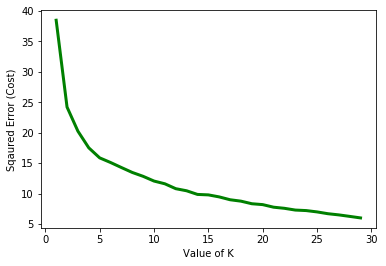

[38.466162030392525, 24.203817634074042, 20.24575294696248, 17.509304908981452, 15.8616007836673, 15.100916587747227, 14.273704755368293, 13.465079049327954, 12.826332797041916, 12.051679252575013, 11.600861916001953, 10.79815714715368, 10.453545656552773, 9.854717725516641, 9.779709502526718, 9.447102608484387, 8.98041350768079, 8.748518719242455, 8.324637811124493, 8.180963902517611, 7.757414717623987, 7.573683485022122, 7.286292212110272, 7.202320171907902, 6.983139087782536, 6.686854501417952, 6.493541980694667, 6.248510477841078, 5.996119100492871]


In [66]:
import matplotlib.pyplot as plt 
%matplotlib inline  

cost =[] 
for i in range(1, 30): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(distribuidor_grouped_clustering) 
    
    cost.append(KM.inertia_)      

plt.plot(range(1, 30), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

print(cost)

In [67]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(distribuidor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 1, 1, 1, 2, 2, 2], dtype=int32)

In [68]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

distribuidor_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
distribuidor_merged = distribuidor_merged.join(neighborhoods_venues_sorted.set_index('ID Station'), on='id')

distribuidor_merged.head() # check the last columns!

,id,distribuidor,comuna,latitud,longitud,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,pe01001,Petrobras,Santiago Centro,-33.453465,-70.644193,0.702481,1.0,0.433635,0.564916,1,Grocery Store,Sushi Restaurant,Restaurant,Pizza Place,Sandwich Place,Rock Club,Cupcake Shop,Latin American Restaurant,Fried Chicken Joint,Flea Market
1,pe01002,Petrobras,Santiago Centro,-33.430747,-70.665559,0.702481,1.0,0.433635,0.564916,1,Sushi Restaurant,Soccer Field,Park,Farmers Market,Bakery,River,Chinese Restaurant,BBQ Joint,Skate Park,Antique Shop
2,pe01003,Petrobras,Santiago Centro,-33.445162,-70.640700,0.702481,1.0,0.433635,0.564916,1,Restaurant,Café,Sushi Restaurant,Pizza Place,Plaza,Coffee Shop,Bakery,Breakfast Spot,Rental Car Location,Residential Building (Apartment / Condo)
3,pe01004,Petrobras,Santiago Centro,-33.442951,-70.636680,0.702481,1.0,0.433635,0.564916,1,Sushi Restaurant,Coffee Shop,Restaurant,Café,Bakery,Chinese Restaurant,Hostel,Peruvian Restaurant,Plaza,Park
4,pe01006,Petrobras,Santiago Centro,-33.459715,-70.652395,0.702481,1.0,0.433635,0.564916,1,Restaurant,South American Restaurant,Gym,Music Store,Men's Store,Sporting Goods Shop,Bus Station,Café,General Entertainment,Theater


In [69]:
print(distribuidor_merged.shape)
distribuidor_merged.dropna(axis=0, inplace=True)
print(distribuidor_merged.shape)

(92, 20)
(92, 20)


In [70]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(distribuidor_merged['latitud'], 
                                  distribuidor_merged['longitud'], 
                                  distribuidor_merged['id'], 
                                  distribuidor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [71]:
distribuidor_merged.loc[distribuidor_merged['Cluster Labels'] == 0, distribuidor_merged.columns[[0] + list(range(5, distribuidor_merged.shape[1]))]]

,id,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,pe1311401,0.503074,0.594964,1.0,0.972007,0,Arts & Crafts Store,Plaza,Grocery Store,Shopping Mall,Restaurant,Sports Bar,Café,Latin American Restaurant,Sushi Restaurant,Bakery
32,pe1311402,0.503074,0.594964,1.0,0.972007,0,Plaza,Bakery,Pizza Place,Rental Car Location,Chinese Restaurant,Park,Sandwich Place,Bus Station,Farmers Market,Liquor Store
33,pe1311403,0.503074,0.594964,1.0,0.972007,0,Pizza Place,Pharmacy,Sushi Restaurant,Convenience Store,Asian Restaurant,American Restaurant,Soccer Field,Coffee Shop,Peruvian Restaurant,Neighborhood
34,pe1311404,0.503074,0.594964,1.0,0.972007,0,Coffee Shop,Sandwich Place,Hotel,Gift Shop,Restaurant,Gym / Fitness Center,Bridge,Shoe Store,Seafood Restaurant,Spanish Restaurant
35,pe1311405,0.503074,0.594964,1.0,0.972007,0,Sushi Restaurant,Pizza Place,Pub,Dance Studio,Café,Martial Arts Dojo,Chinese Restaurant,Farmers Market,Burger Joint,Building
36,te1311401,0.503074,0.594964,1.0,0.972007,0,Gym / Fitness Center,Athletics & Sports,Gym,Convenience Store,Plaza,Bar,Supermarket,Paper / Office Supplies Store,Restaurant,Tennis Court


In [72]:
distribuidor_merged.loc[distribuidor_merged['Cluster Labels'] == 1, distribuidor_merged.columns[[0] + list(range(5, distribuidor_merged.shape[1]))]]

,id,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,pe01001,0.702481,1.000000,0.433635,0.564916,1,Grocery Store,Sushi Restaurant,Restaurant,Pizza Place,Sandwich Place,Rock Club,Cupcake Shop,Latin American Restaurant,Fried Chicken Joint,Flea Market
1,pe01002,0.702481,1.000000,0.433635,0.564916,1,Sushi Restaurant,Soccer Field,Park,Farmers Market,Bakery,River,Chinese Restaurant,BBQ Joint,Skate Park,Antique Shop
2,pe01003,0.702481,1.000000,0.433635,0.564916,1,Restaurant,Café,Sushi Restaurant,Pizza Place,Plaza,Coffee Shop,Bakery,Breakfast Spot,Rental Car Location,Residential Building (Apartment / Condo)
3,pe01004,0.702481,1.000000,0.433635,0.564916,1,Sushi Restaurant,Coffee Shop,Restaurant,Café,Bakery,Chinese Restaurant,Hostel,Peruvian Restaurant,Plaza,Park
4,pe01006,0.702481,1.000000,0.433635,0.564916,1,Restaurant,South American Restaurant,Gym,Music Store,Men's Store,Sporting Goods Shop,Bus Station,Café,General Entertainment,Theater
5,pe01008,0.702481,1.000000,0.433635,0.564916,1,Sandwich Place,Pizza Place,Chinese Restaurant,Restaurant,Pharmacy,Peruvian Restaurant,Sushi Restaurant,Breakfast Spot,Cosmetics Shop,South American Restaurant
22,pe1311003,0.634145,0.605826,0.469080,0.510531,1,Sushi Restaurant,Pizza Place,Burger Joint,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Pub,Cantonese Restaurant,Restaurant,Supermarket
23,pe1311004,0.634145,0.605826,0.469080,0.510531,1,Chinese Restaurant,Sushi Restaurant,Fast Food Restaurant,Burger Joint,Bakery,Restaurant,Park,Sandwich Place,Clothing Store,Pub
24,pe1311005,0.634145,0.605826,0.469080,0.510531,1,Pharmacy,Bus Station,Peruvian Restaurant,Chinese Restaurant,Tennis Stadium,Fast Food Restaurant,Metro Station,Soccer Field,Electronics Store,Fried Chicken Joint
25,pe1311006,0.634145,0.605826,0.469080,0.510531,1,Performing Arts Venue,Dog Run,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [73]:
distribuidor_merged.loc[distribuidor_merged['Cluster Labels'] == 2, distribuidor_merged.columns[[0] + list(range(5, distribuidor_merged.shape[1]))]]

,id,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,pe1310201,0.113914,0.094380,0.063348,0.259664,2,Hot Dog Joint,Plaza,Big Box Store,Pharmacy,Chinese Restaurant,Yoga Studio,Donut Shop,Food,Flower Shop,Flea Market
7,pe1312101,0.113914,0.094380,0.063348,0.259664,2,Ice Cream Shop,Food Truck,Plaza,Restaurant,Farmers Market,Gastropub,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop
8,pe1312602,0.208091,0.166543,0.088235,0.115702,2,Construction & Landscaping,Convenience Store,Intersection,Diner,Sushi Restaurant,Electronics Store,Food & Drink Shop,Food,Flower Shop,Flea Market
9,pe1310401,0.197786,0.165146,0.080694,0.225007,2,Ice Cream Shop,Department Store,Furniture / Home Store,Donut Shop,Coffee Shop,Pharmacy,Pub,Burger Joint,Bus Station,Sandwich Place
10,pe1310402,0.197786,0.165146,0.080694,0.225007,2,Chinese Restaurant,Farmers Market,Pharmacy,Athletics & Sports,Gym,Yoga Studio,Dog Run,Food,Flower Shop,Flea Market
11,pe1310404,0.197786,0.165146,0.080694,0.225007,2,Restaurant,Chinese Restaurant,Pharmacy,Gym,Liquor Store,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop
12,pe1310501,0.262432,0.219682,0.128959,0.278859,2,Ice Cream Shop,Flea Market,Pharmacy,Shopping Mall,Department Store,Bar,Sushi Restaurant,Electronics Store,Food,Flower Shop
13,pe1310502,0.262432,0.219682,0.128959,0.278859,2,Bus Station,Chinese Restaurant,Supermarket,Grocery Store,Sandwich Place,Pizza Place,Pharmacy,Intersection,Sushi Restaurant,Donut Shop
14,pe1310601,0.234312,0.244025,0.107089,0.316716,2,Park,Liquor Store,Chinese Restaurant,Bar,Bakery,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop
15,pe1310602,0.234312,0.244025,0.107089,0.316716,2,Bus Station,Bakery,Pharmacy,Hot Dog Joint,Coffee Shop,Performing Arts Venue,Residential Building (Apartment / Condo),Chinese Restaurant,Fast Food Restaurant,Shopping Mall


In [74]:
distribuidor_merged.loc[distribuidor_merged['Cluster Labels'] == 3, distribuidor_merged.columns[[0] + list(range(5, distribuidor_merged.shape[1]))]]

,id,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,pe1311301,0.135653,0.122521,0.239065,0.862970,3,Sushi Restaurant,Gym / Fitness Center,Plaza,Playground,Pizza Place,Fish & Chips Shop,General Entertainment,Cupcake Shop,Italian Restaurant,Café
29,pe1311303,0.135653,0.122521,0.239065,0.862970,3,Chinese Restaurant,Sushi Restaurant,Peruvian Restaurant,Restaurant,Bar,Ice Cream Shop,Gymnastics Gym,Japanese Restaurant,Fried Chicken Joint,Pizza Place
30,pe1311304,0.135653,0.122521,0.239065,0.862970,3,Airport,Plaza,Farmers Market,Skate Park,Chinese Restaurant,Bus Station,Park,Seafood Restaurant,Donut Shop,Flower Shop
37,pe1311501,0.159377,0.130149,0.284314,0.826713,3,Coffee Shop,Restaurant,Sandwich Place,Gym / Fitness Center,Supermarket,Park,Gym,Asian Restaurant,Cafeteria,Arts & Crafts Store
38,pe1311502,0.159377,0.130149,0.284314,0.826713,3,Convenience Store,Gym / Fitness Center,Multiplex,Shopping Mall,Supermarket,Bakery,Restaurant,Bookstore,Cosmetics Shop,Coffee Shop
39,pe1311503,0.159377,0.130149,0.284314,0.826713,3,Pharmacy,Ice Cream Shop,Clothing Store,Fast Food Restaurant,Sushi Restaurant,Department Store,Burger Joint,Café,Candy Store,Coffee Shop
52,pe1312301,0.225289,0.343001,0.484917,0.818715,3,Peruvian Restaurant,Pizza Place,Coffee Shop,Restaurant,Sandwich Place,Sushi Restaurant,Southern / Soul Food Restaurant,Steakhouse,Karaoke Bar,Latin American Restaurant
53,pe1312302,0.225289,0.343001,0.484917,0.818715,3,Café,Bar,Restaurant,Sandwich Place,Hotel,Gastropub,Park,Coffee Shop,Pub,Snack Place
68,pe1313201,0.122191,0.133105,0.349170,1.000000,3,Coffee Shop,Park,Sushi Restaurant,Café,Supermarket,Bakery,Gift Shop,Candy Store,Salon / Barbershop,Deli / Bodega
69,pe1313202,0.122191,0.133105,0.349170,1.000000,3,Café,Cocktail Bar,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Sushi Restaurant,Pharmacy,Pub,Pizza Place


In [75]:
distribuidor_merged.loc[distribuidor_merged['Cluster Labels'] == 4, distribuidor_merged.columns[[0] + list(range(5, distribuidor_merged.shape[1]))]]

,id,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,pe1312402,0.385702,0.332155,0.201357,0.347374,4,Food,Yoga Studio,Donut Shop,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [76]:
distribuidor_merged.loc[distribuidor_merged['Cluster Labels'] == 5, distribuidor_merged.columns[[0] + list(range(5, distribuidor_merged.shape[1]))]]

,id,habitantes,viviendas,vehículos,calidad,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,pe1312001,0.345594,0.456996,0.475113,0.751800,5,Bakery,Gym,Beach,Gastropub,Sushi Restaurant,Pizza Place,Food Truck,Internet Cafe,Convenience Store,Smoke Shop
46,pe1312002,0.345594,0.456996,0.475113,0.751800,5,Sushi Restaurant,Bar,Sandwich Place,Middle Eastern Restaurant,Snack Place,Gym,Latin American Restaurant,Metro Station,Miscellaneous Shop,Fish & Chips Shop
47,pe1312003,0.345594,0.456996,0.475113,0.751800,5,Bakery,Pet Store,Liquor Store,Restaurant,Chinese Restaurant,Farmers Market,Flower Shop,Sandwich Place,Falafel Restaurant,Café
48,pe1312004,0.345594,0.456996,0.475113,0.751800,5,Pizza Place,Bakery,Clothing Store,Tea Room,Shop & Service,Cheese Shop,Peruvian Restaurant,Food Truck,Snack Place,IT Services
49,pe1311801,0.406261,0.339943,0.322021,0.431885,5,Bakery,Multiplex,Burrito Place,Dessert Shop,Yoga Studio,Event Space,Food & Drink Shop,Food,Flower Shop,Flea Market
50,pe1312201,0.406261,0.339943,0.322021,0.431885,5,Pizza Place,Pharmacy,Park,Theme Park,Café,Bakery,Supermarket,Restaurant,Chinese Restaurant,Sandwich Place
51,pe1312202,0.406261,0.339943,0.322021,0.431885,5,BBQ Joint,Gastropub,Karaoke Bar,Bakery,South American Restaurant,Electronics Store,Food Court,Food & Drink Shop,Food,Flower Shop
54,pe1312401,0.385702,0.332155,0.201357,0.347374,5,Hotel,Food,Rental Car Location,Yoga Studio,Dog Run,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
56,pe1312501,0.349545,0.297501,0.171192,0.474007,5,Pharmacy,Chinese Restaurant,Plaza,Fast Food Restaurant,Sushi Restaurant,Pie Shop,Bus Line,Pizza Place,Bus Station,Multiplex
57,pe1312502,0.349545,0.297501,0.171192,0.474007,5,Sandwich Place,Nightclub,Food Court,Hot Dog Joint,Bar,Gym,Basketball Stadium,Event Space,Falafel Restaurant,Yoga Studio
